# PRÁCTICA 9: PERCEPTRÓN SIMPLE Y ADALINE

###### Técnicas de Aprendizaje Automático 2019/2020 <br>Patricia Aguado Labrador

## EJERCICIO 1

Generar aleatoriamente 2 grupos de 1000 muestras con 2 atributos, representar gráficamente y comprobar si son linealmente separables. En el caso de no ser linealmente separables, desplazar las muestras a través de uno de los atributos para permitir la separacion lineal de ambos grupos.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Muestras de 1000 instancias, 2 atributos y 1 clase cada una
X_g1, y_g1 = make_blobs(n_samples=1000, n_features=2, centers=1, random_state=4)
X_g2, y_g2 = make_blobs(n_samples=1000, n_features=2, centers=1, random_state=3)

In [3]:
# Juntamos ambas muestras para normalizar los datos
X = np.concatenate((X_g1, X_g2), axis=0)
X = MinMaxScaler().fit_transform(X)

# Introducimos dos clases en el conjunto de datos ya que se crearon ambos con clase 0
y_g1 = y_g1-1
y_g2 = y_g2+1
y = np.concatenate((y_g1, y_g2), axis=0)

### Muestras en el plano XY

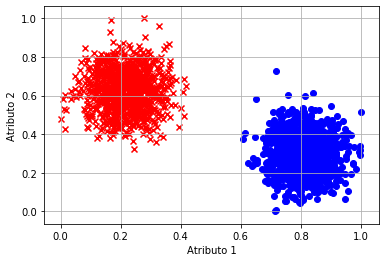

In [4]:
# Instancias con la clase -1 en azul
plt.scatter(X[np.argwhere(y==-1),0], X[np.argwhere(y==-1),1], c='blue', marker='o')
# Instancias con la clase 1 en rojo
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='red', marker='x')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid()
plt.show()

Como podemos ver en el gráfico ambas muestras son linealmente separables ya que podríamos tener un hiperplano que separase claramente ambas muestras.

In [5]:
class perceptron_simple():
    def __init__(self, n_inputs=2, n_outputs=1, W=None, b=None):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = W
        self.b = b
        #print(W,b)
        # Valores en un rango [-0.5,0.5] devueltos en una matriz 1x2
        if self.W is None:
            self.W = np.random.rand(self.n_outputs, self.n_inputs)-0.5
        # Valores en un rango [-0.5,0.5] devueltos en una matriz 1x1
        if self.b is None:
            self.b = np.random.rand(self.n_outputs, 1)-0.5
        #print(self.W, self.W.shape, self.b, self.b.shape)
        
    # Método que realiza la predicción para unos valores de entrada dados
    # Devuelve una lista de enteros tras aplicar la función de activación a la suma de la multiplicación
    # de los pesos por la entrada y el umbral
    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).T.astype(int)
    
    # Método para entrenar el perceptrón
    def train(self, X, D):
        # Comprueba si con las muestras y los pesos que tiene hay coincidencia con la salida deseada
        if np.sum(self.predict(X) == D) != D.shape[0]:
            continuar = True
            p = 0
            
            # Con los pesos que tenemos no se puede separar las muestras 
            while continuar:
                v = p % X.shape[0]
                x = X[v].reshape(1,-1)
                y = self.predict(x)
                d = D[v].reshape(1,-1)
                #print(X.shape[0], "v=", v, "x=", x, x.shape, "_y=", y, "_d=", d)
                #print(y, y.shape, d, d.shape)
                
                # Modificamos los pesos y el umbral
                if y != d:
                    self.W += d*x
                    self.b += d
                    # Comprueba si con las muestras y los pesos que tiene hay coincidencia con la salida deseada
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        continuar = False  # Las muestras se separan
                p += 1
        return
    
    # Devuelve los valores de los pesos y del umbral
    def get_params(self):
        return self.W, self.b

In [6]:
# Creamos un perceptrón con 2 atributos para la entrada y 1 neurona en la capa de salida
# Los pesos iniciales y el umbral se fijarán aleatoriamente
ps = perceptron_simple(n_inputs=2, n_outputs=1)

In [7]:
# Entrenamos el perceptrón
ps.train(X,y.reshape(-1,1))

In [8]:
# Obtenemos los parámetros para representar la recta que separa ambas muestras
pesos, bias = ps.get_params()

### Muestras y separador lineal en el plano XY

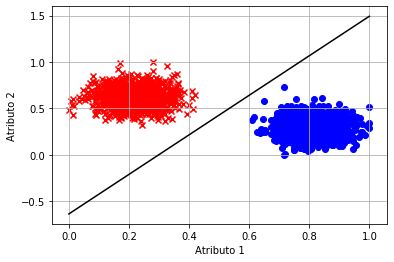

In [9]:
# Instancias con la clase -1 en azul
plt.scatter(X[np.argwhere(y==-1),0], X[np.argwhere(y==-1),1], c='blue', marker='o')
# Instancias con la clase 1 en rojo
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='red', marker='x')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.xlim = (0,1)
plt.ylim = (0,2)
plt.grid()
x1 = np.array([0.0,1.0])
# Calculo de la y correspondiente a los puntos x1
x2 = np.array([-bias[0,0]/pesos[0,1],(-bias[0,0]-pesos[0,0])/pesos[0,1]])
plt.plot(x1, x2, c='black')
plt.show()